# 简单CNN完成红绿灯分类
- 参考 基于 Keras 的猫狗分类识别
- tensorflow-gpu 1.13.1
- keras

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

Using TensorFlow backend.


In [2]:
# 定义模型
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

# 定义优化器
adam = Adam(lr=1e-4)

# 定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [4]:
batch_size = 16

# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    'traffic_light_images/training',
    target_size=(32,32),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    'traffic_light_images/test',
    target_size=(32,32),
    batch_size=batch_size,
    )

Found 1187 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'green': 0, 'red': 1, 'yellow': 2}

In [29]:
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=test_generator,validation_steps=len(test_generator))

Epoch 1/5
75/75 [==============================] - 1s 16ms/step - loss: 0.0146 - acc: 0.9958 - val_loss: 0.0036 - val_acc: 0.9966
Epoch 2/5
75/75 [==============================] - 1s 15ms/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 3/5
75/75 [==============================] - 1s 15ms/step - loss: 0.0160 - acc: 0.9967 - val_loss: 0.0039 - val_acc: 0.9966
Epoch 4/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0042 - acc: 0.9983 - val_loss: 9.5739e-04 - val_acc: 1.0000
Epoch 5/5
75/75 [==============================] - 1s 15ms/step - loss: 0.0063 - acc: 0.9992 - val_loss: 9.3753e-04 - val_acc: 1.0000


In [30]:
# pip install h5py
model.save('model_cnn.h5')

# 测试

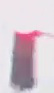

In [35]:
from keras.models import load_model
import numpy as np

label = np.array(['green','red', 'yellow'])
# 载入模型
model = load_model('model_cnn.h5')

# 导入图片
image = load_img('traffic_light_images/test/red/0ba83f83-a49c-4319-8ee2-547082ef7503.jpg')
image

In [36]:
image = image.resize((32,32))
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,0)
image.shape

(1, 32, 32, 3)

In [37]:
print(label[model.predict_classes(image)])

['red']


In [38]:
import glob
import os
image_dir = "traffic_light_images/test"
image_types = ["red", "yellow", "green"]
total = 0
miss = 0
for im_type in image_types:
    for file in glob.glob(os.path.join(image_dir, im_type, "*")):
        total += 1
        image = load_img(file)
        image = image.resize((32,32))
        image = img_to_array(image)
        image = image/255
        image = np.expand_dims(image,0)
        predicted_label = label[model.predict_classes(image)]
        if predicted_label[0] != im_type:
            print("ture label: ",im_type, "  predicted label: ", predicted_label[0])
            miss += 1
print("Number of misclassified images = ", miss,  ' out of '+ str(total))
print("accuracy: ", 1-miss/total)

Number of misclassified images =  0  out of 297
accuracy:  1.0
